**MUSHROOM CLASSIFIER**

In [115]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [146]:
df = pd.read_excel(r"C:\Users\taran\OneDrive\Documents\ML Datasets\mushrooms_dataset.xlsx")
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Exploratory Data Analysis**

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [118]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

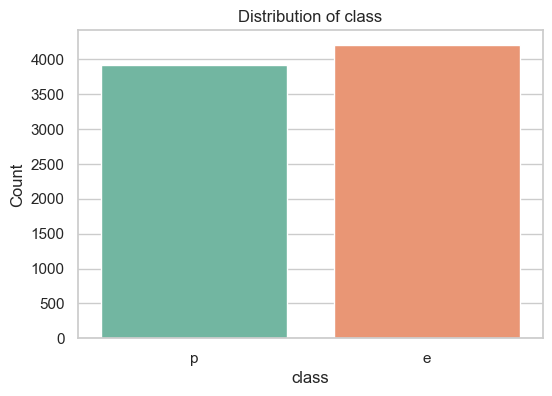

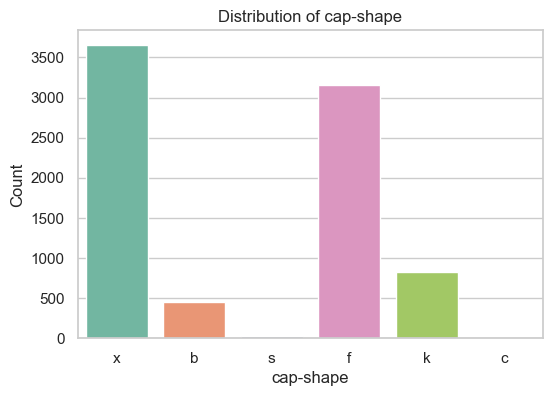

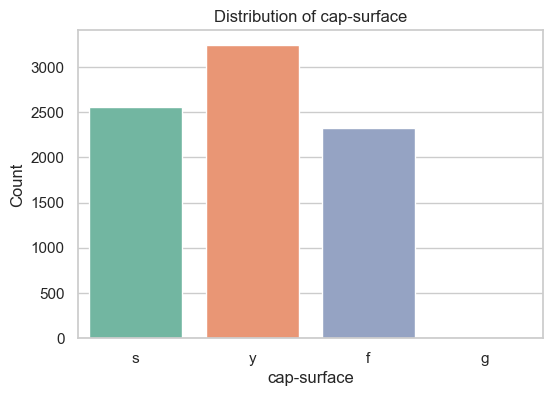

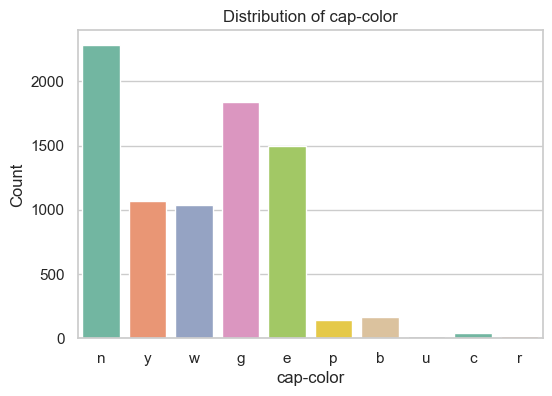

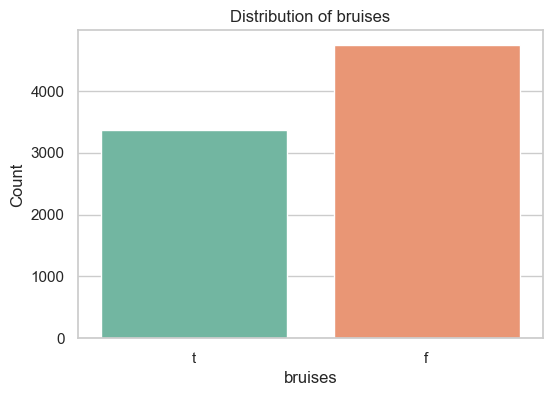

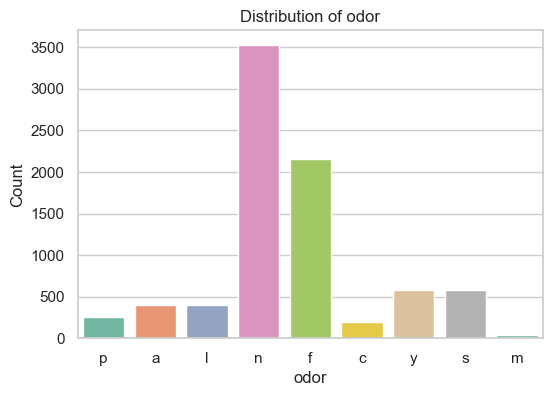

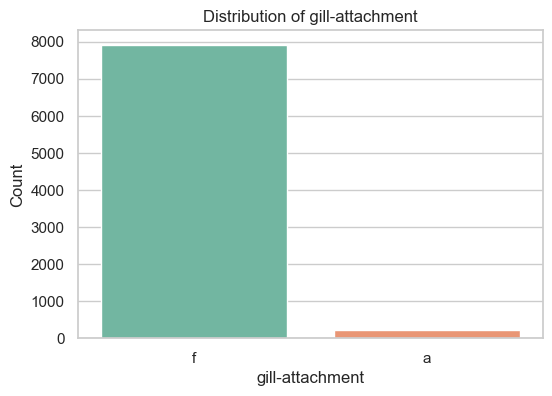

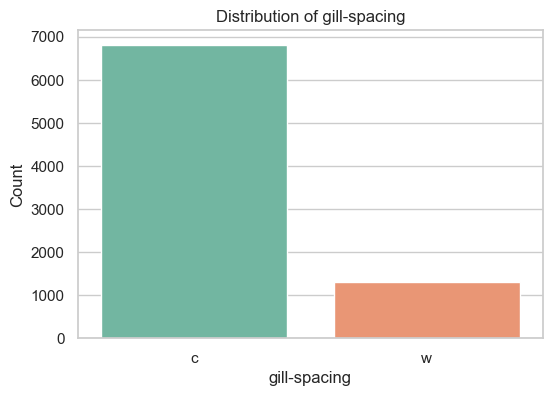

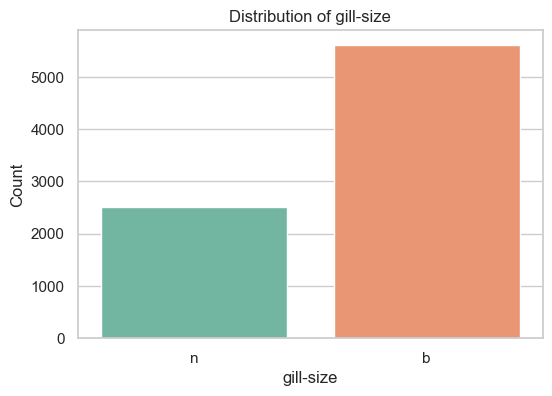

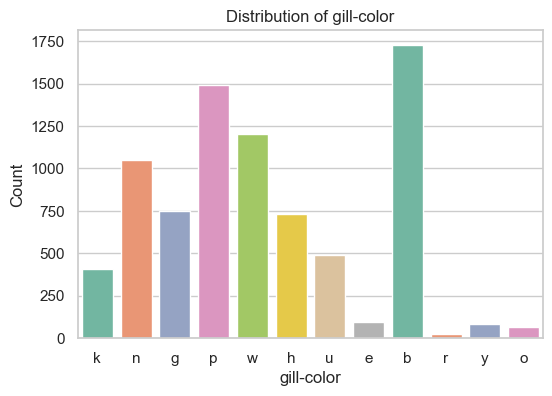

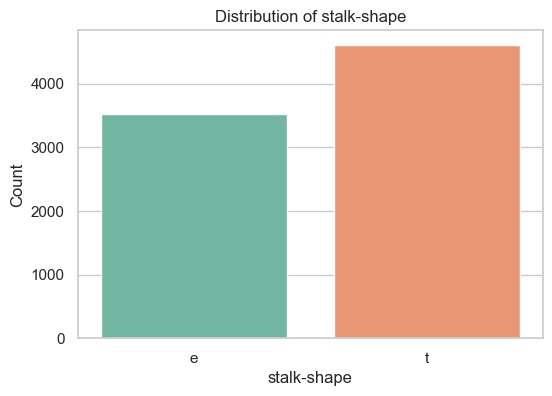

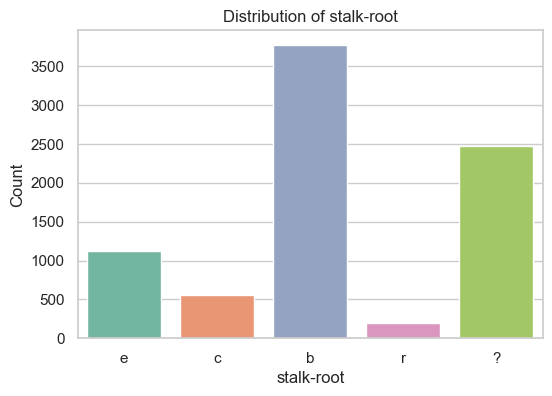

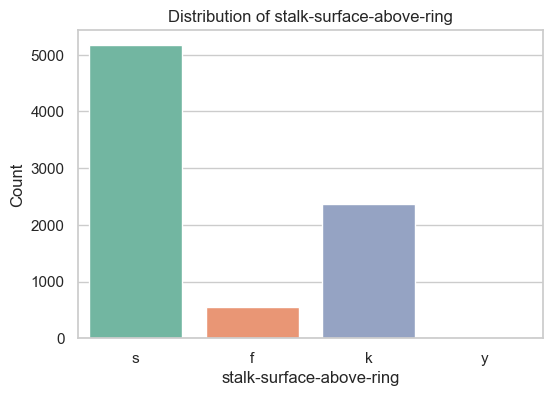

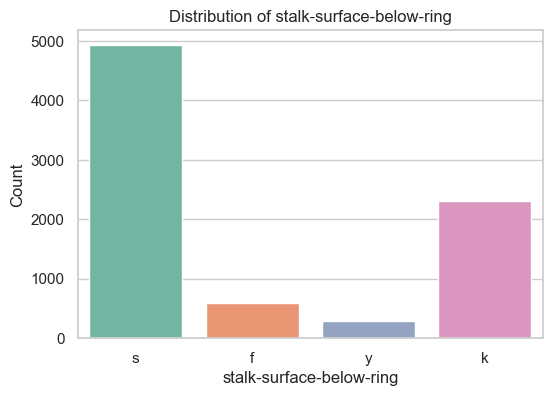

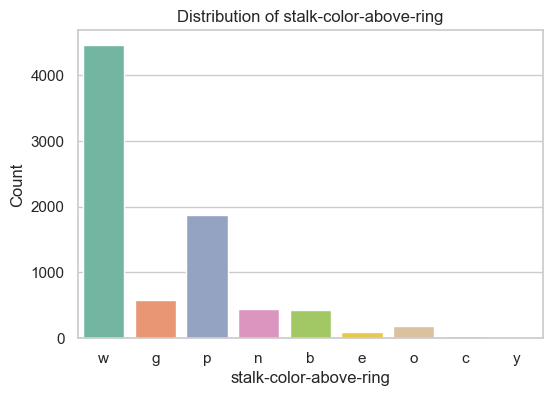

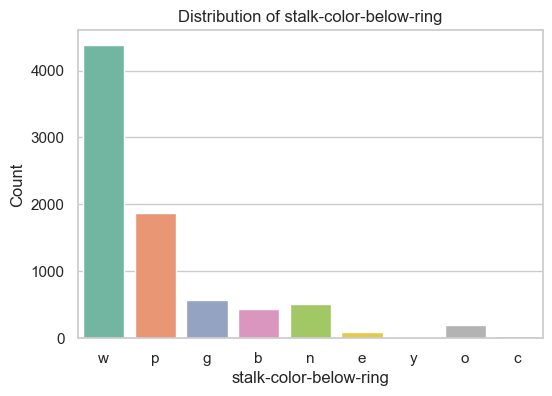

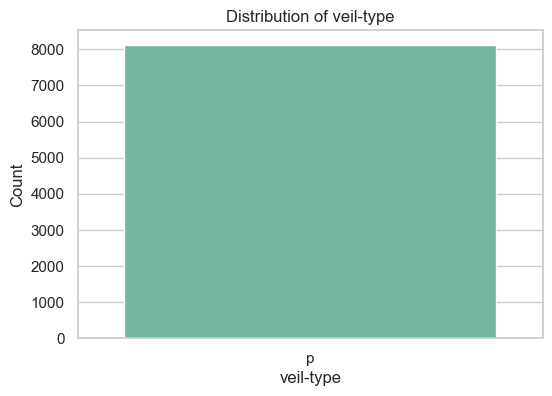

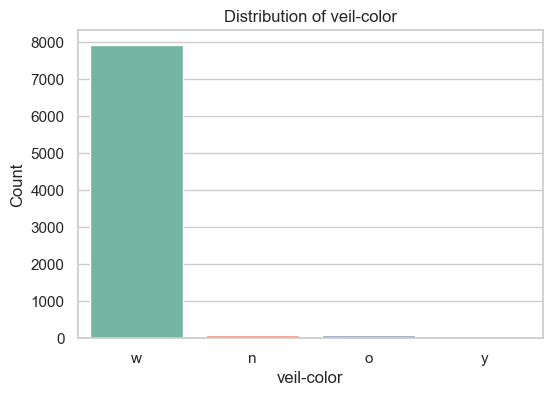

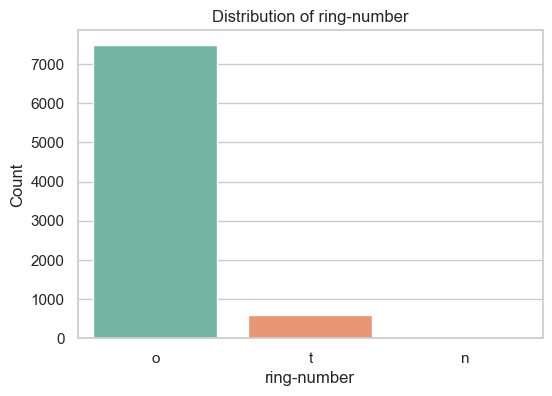

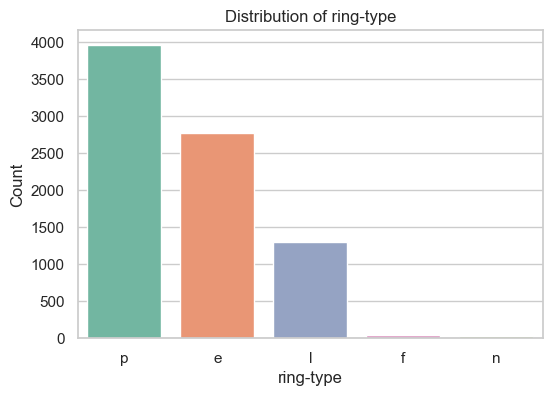

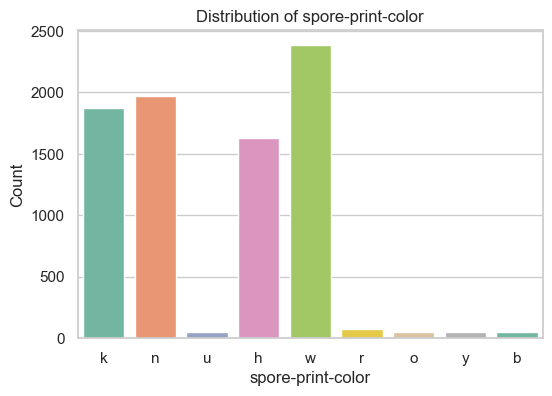

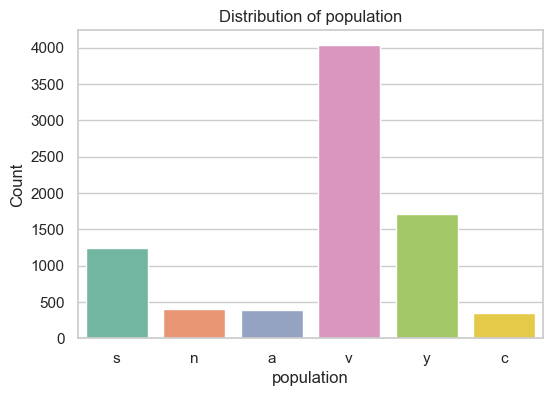

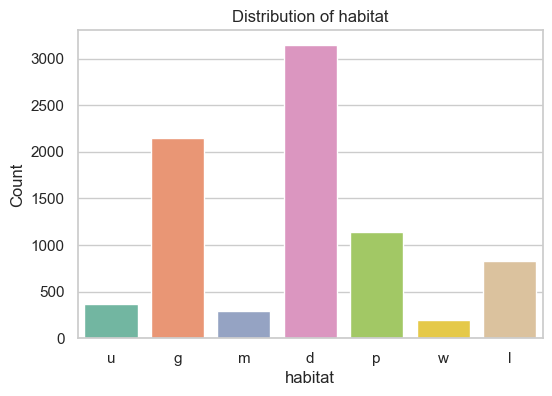

In [119]:
# Set plot style
sns.set(style="whitegrid")

# Plot count plots for all categorical columns
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)  
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.show()

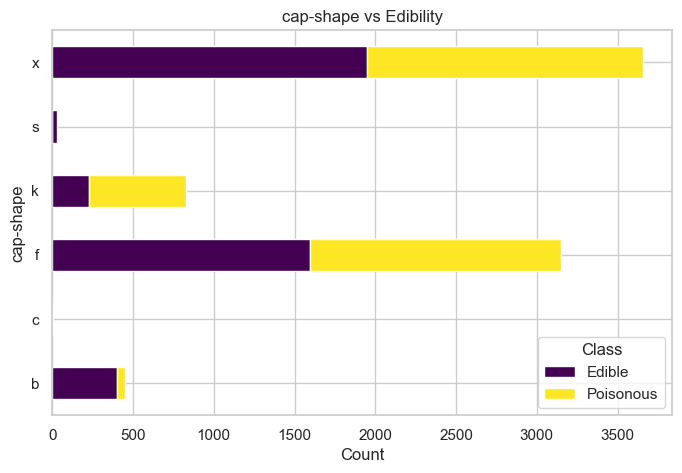

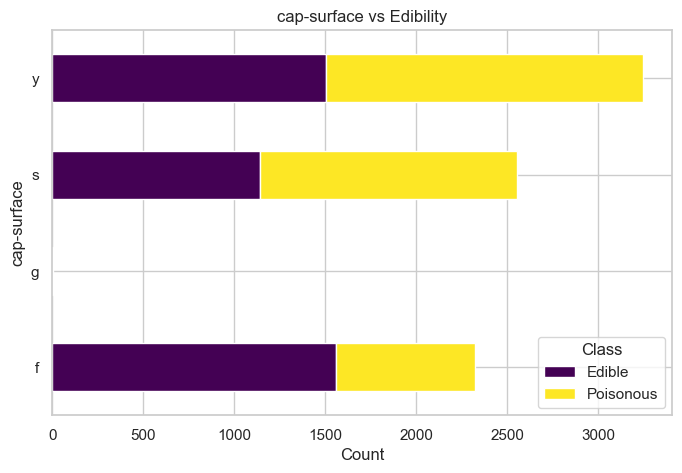

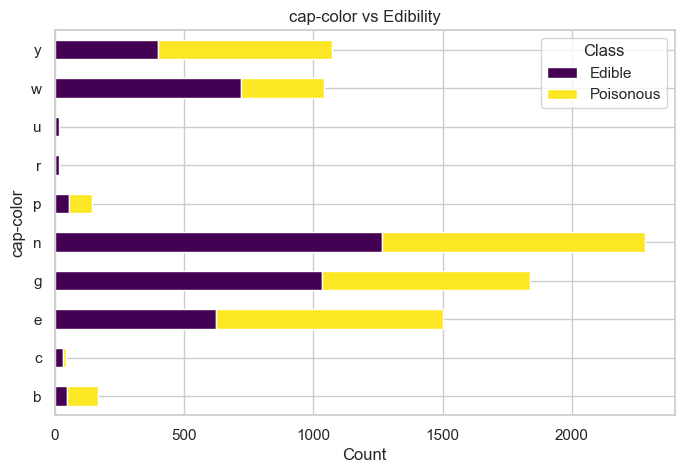

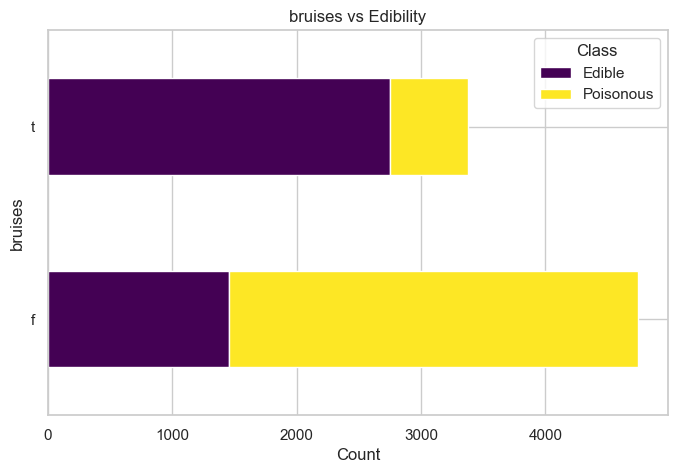

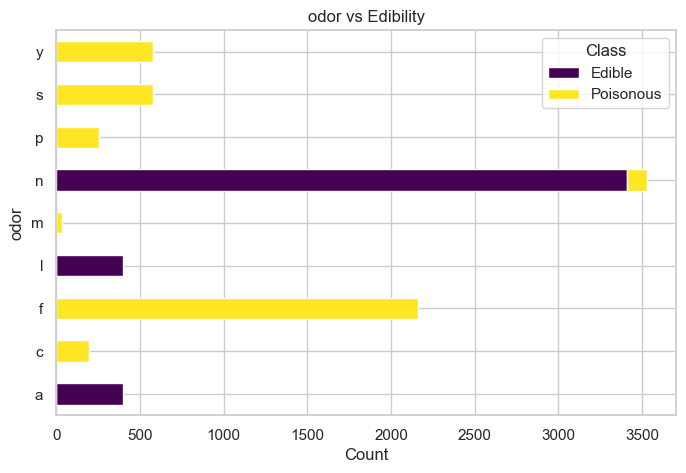

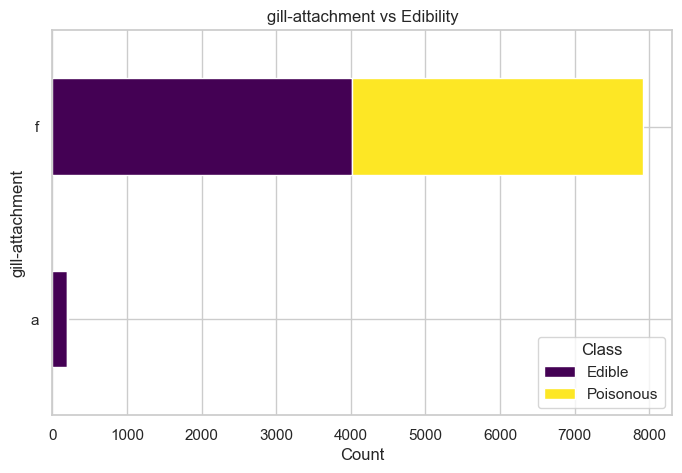

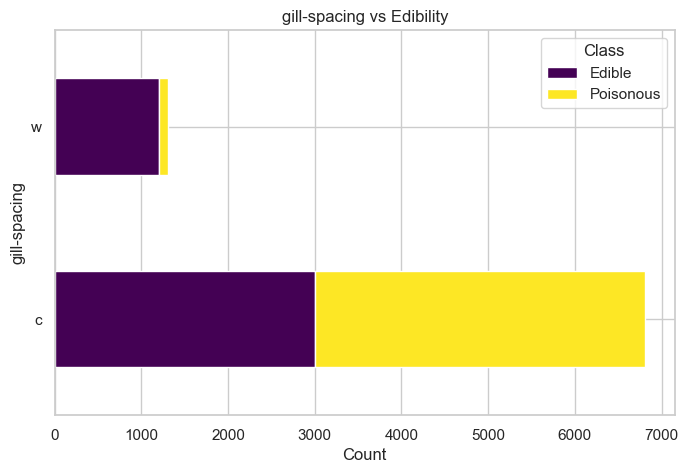

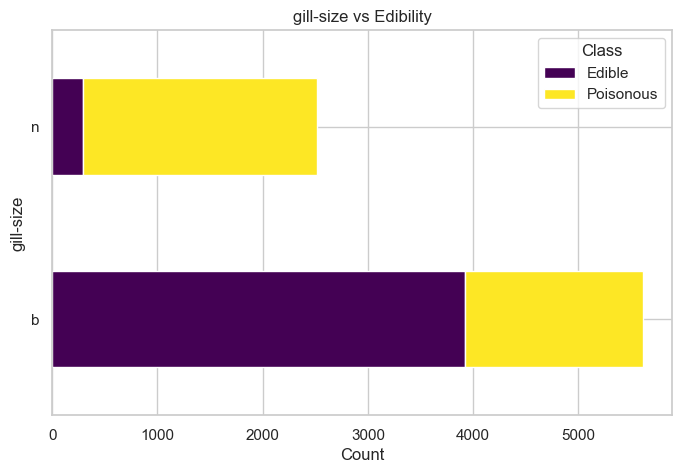

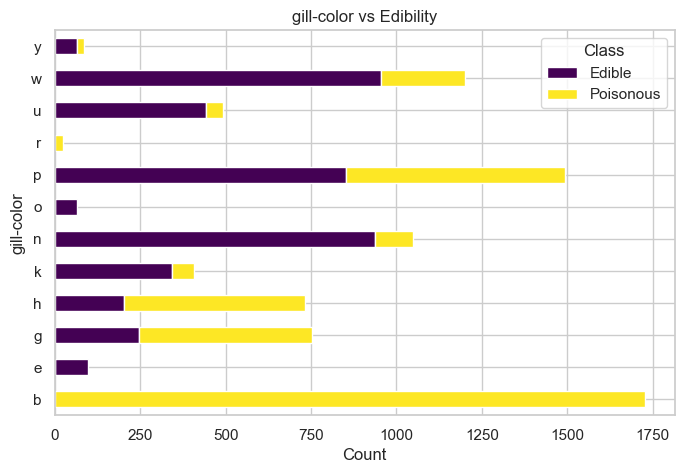

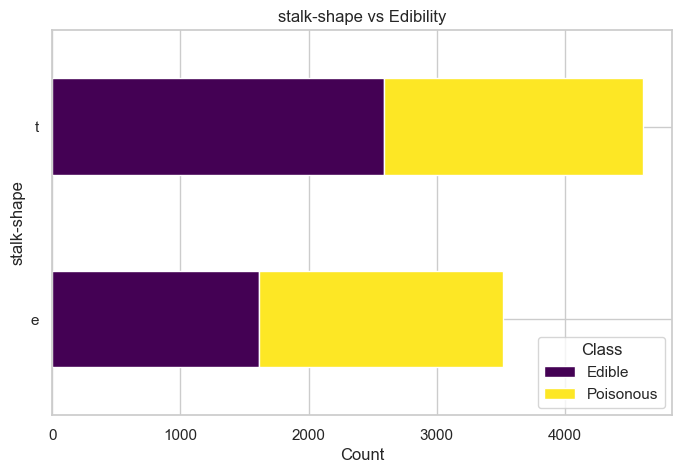

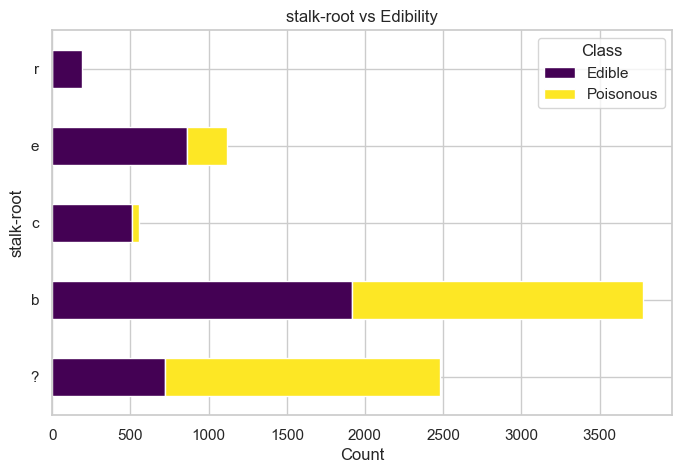

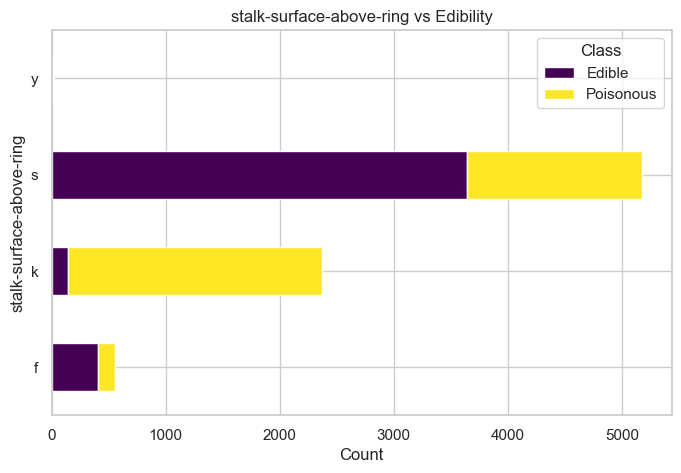

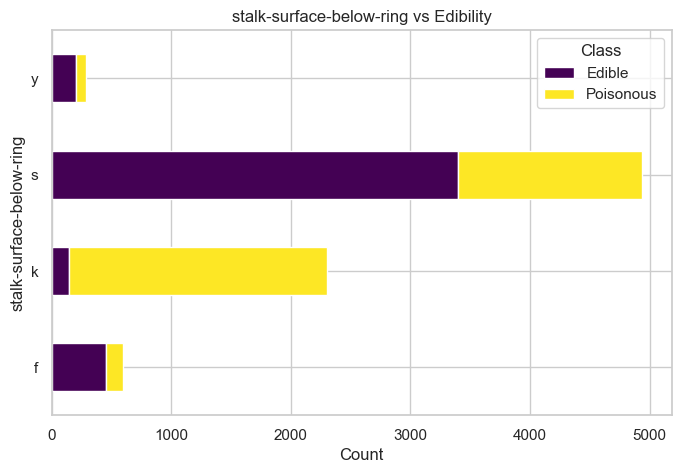

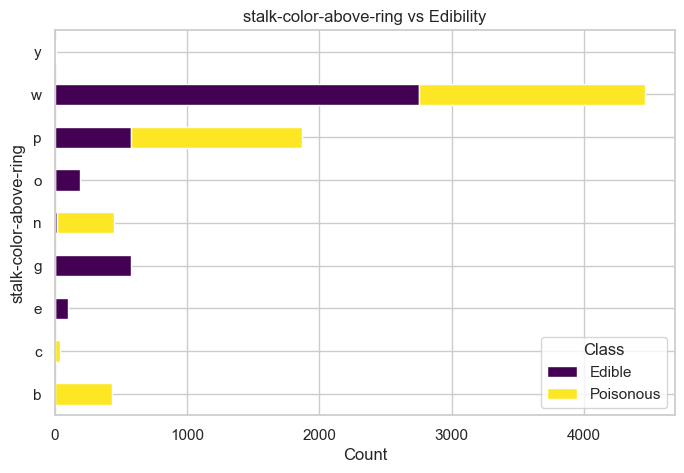

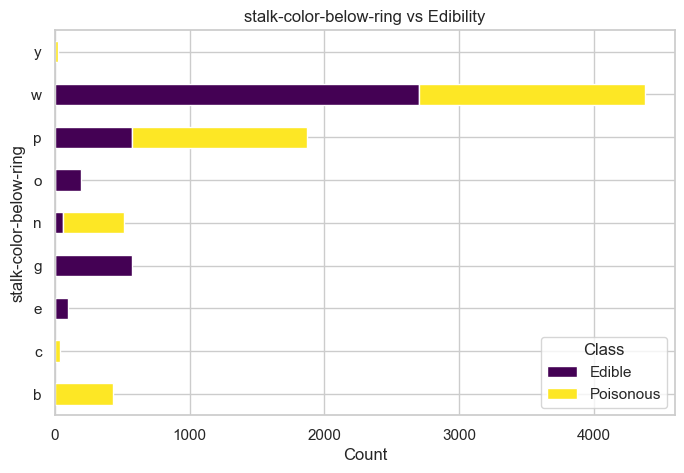

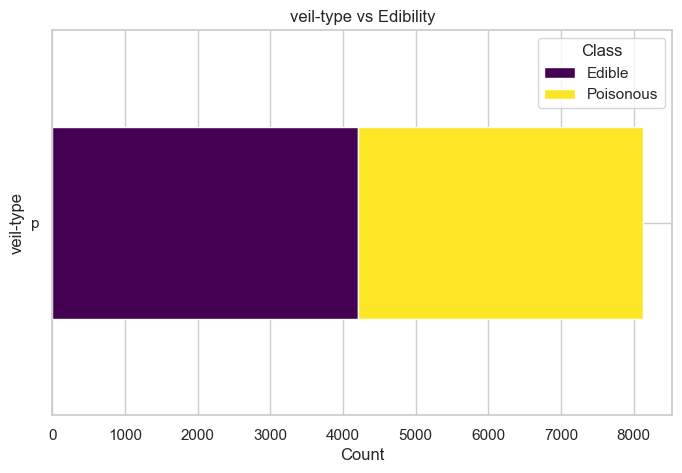

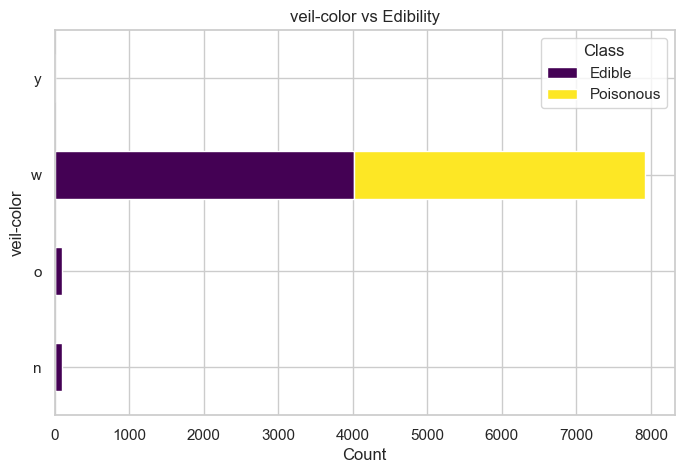

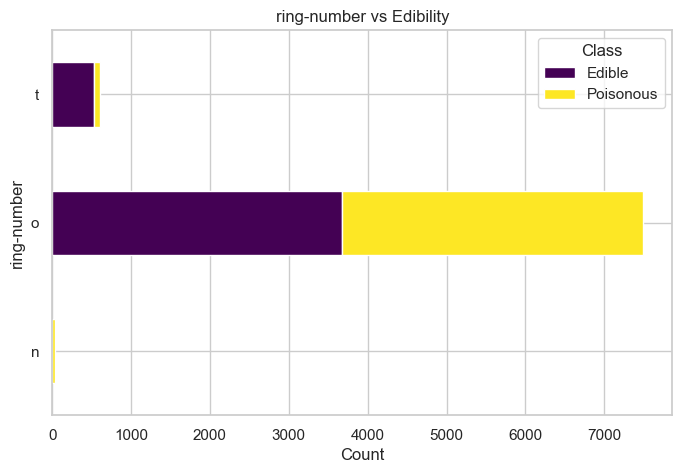

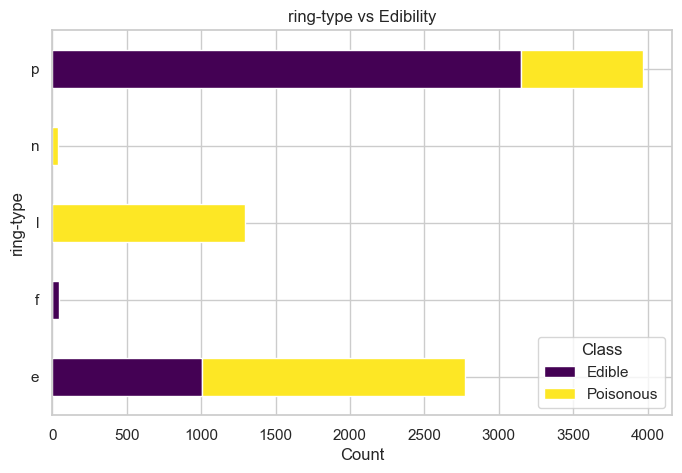

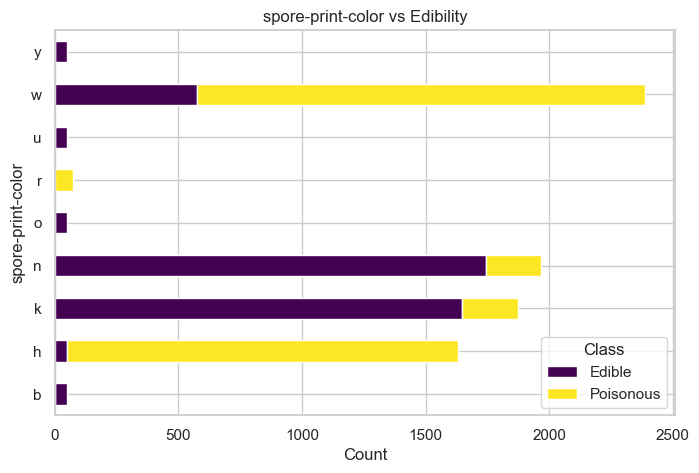

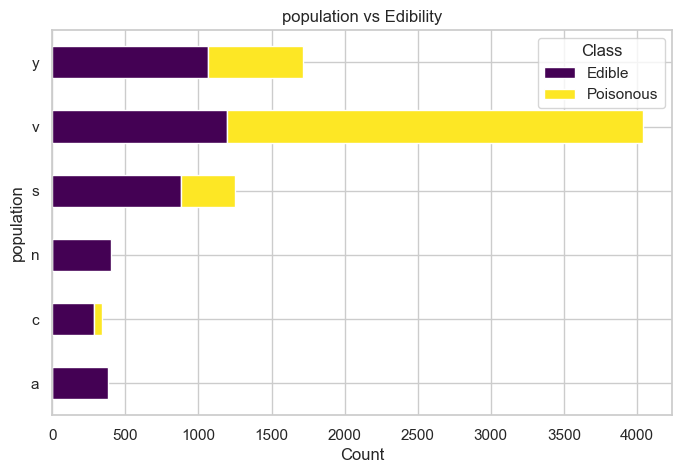

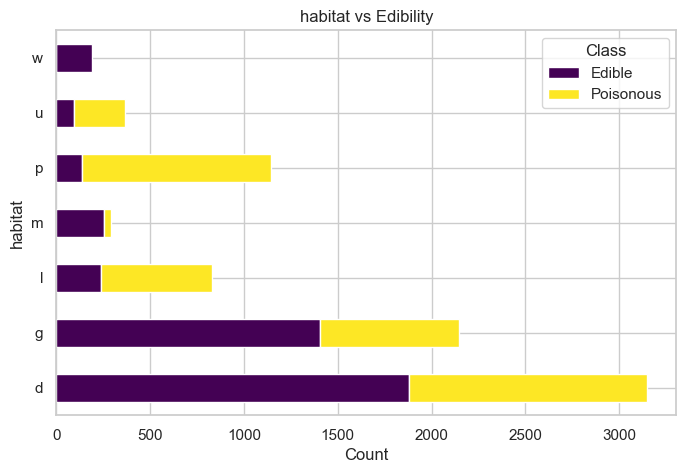

In [120]:
sns.set(style='whitegrid')

for col in df.columns[1:]:
    # Create a crosstab
    crosstab_result = pd.crosstab(df[col], df['class'].map({'e':'Edible', 'p':'Poisonous'}))

    # Plot the bar chart
    ax = crosstab_result.plot(kind='barh', stacked=True, figsize=(8, 5), colormap="viridis")

    # Set labels and title
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.title(f"{col} vs Edibility")

    # Ensure legend is correctly mapped
    plt.legend(title="Class", labels=crosstab_result.columns.to_list())

    plt.show()

**Data Preprocessing**

In [121]:
unique_counts = df.nunique()
print(unique_counts)

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [148]:
# Drop 'veil-type' since it has only 1 unique value
df.drop(columns=['veil-type'], inplace=True)

In [149]:
# Label Encoding for binary categorical features
from sklearn.preprocessing import LabelEncoder
binary_features = ['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape']
label_enc = LabelEncoder()
for col in binary_features:
    df[col] = label_enc.fit_transform(df[col])

In [150]:
# One-Hot Encoding for low-cardinality features (≤ 10 unique values)
from sklearn.preprocessing import OneHotEncoder
one_hot_features = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'stalk-root',
                    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                    'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
                    'spore-print-color', 'population', 'habitat']
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

In [151]:
# Target Encoding for high-cardinality features (>10 unique values)
import category_encoders as ce
target_features = ['gill-color']
target_enc = ce.TargetEncoder(cols=target_features)
df[target_features] = target_enc.fit_transform(df[target_features], df['class'])  # Encode based on class labels

C:\Users\taran\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
C:\Users\taran\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [82]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0.156863,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,1,1,0,0,0.156863,0,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,0,1,1,0,0,0.106870,0,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,1,1,0,1,0.106870,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0,0,1,1,0,0.156863,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [83]:
df.dtypes

class              int64
bruises            int64
gill-attachment    int64
gill-spacing       int64
gill-size          int64
                   ...  
habitat_l           bool
habitat_m           bool
habitat_p           bool
habitat_u           bool
habitat_w           bool
Length: 86, dtype: object

In [84]:
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0.156863,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0.156863,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0.106870,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0.106870,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,1,0,0.156863,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


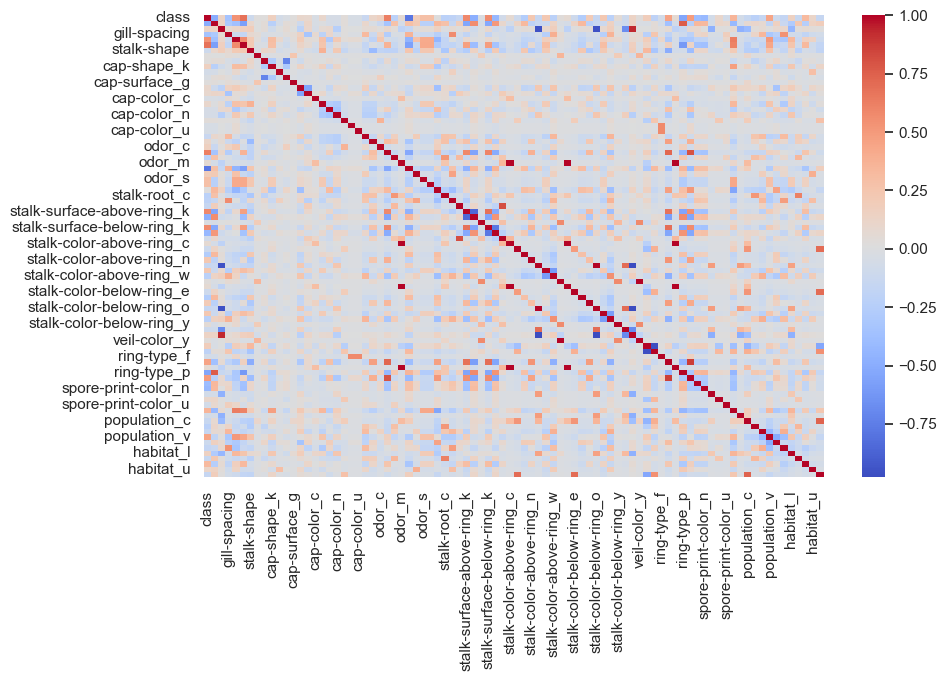

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.show()

In [86]:
X = df.drop(columns=['class'])
y = df['class']

#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training the Model**

In [90]:
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [91]:
y_pred = model.predict(X_test)

In [92]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [93]:
# Compute correlation matrix
corr_matrix = df.corr().abs()  # Take absolute values to consider both positive and negative correlations

# Set a threshold for high correlation (e.g., 0.9)
threshold = 0.9

# Find feature pairs that have correlation above the threshold
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
                   if col1 != col2 and corr_matrix.loc[col1, col2] > threshold]

# Display the highly correlated feature pairs
print("Highly correlated features:")
for f1, f2 in high_corr_pairs:
    print(f"{f1} ↔ {f2} (correlation = {corr_matrix.loc[f1, f2]:.2f})")

Highly correlated features:
gill-attachment ↔ stalk-color-above-ring_o (correlation = 0.96)
gill-attachment ↔ stalk-color-below-ring_o (correlation = 0.96)
gill-attachment ↔ veil-color_w (correlation = 0.94)
odor_m ↔ stalk-color-above-ring_c (correlation = 1.00)
odor_m ↔ stalk-color-below-ring_c (correlation = 1.00)
odor_m ↔ ring-type_n (correlation = 1.00)
stalk-color-above-ring_c ↔ odor_m (correlation = 1.00)
stalk-color-above-ring_c ↔ stalk-color-below-ring_c (correlation = 1.00)
stalk-color-above-ring_c ↔ ring-type_n (correlation = 1.00)
stalk-color-above-ring_o ↔ gill-attachment (correlation = 0.96)
stalk-color-above-ring_o ↔ stalk-color-below-ring_o (correlation = 1.00)
stalk-color-above-ring_o ↔ veil-color_w (correlation = 0.98)
stalk-color-above-ring_y ↔ veil-color_y (correlation = 1.00)
stalk-color-below-ring_c ↔ odor_m (correlation = 1.00)
stalk-color-below-ring_c ↔ stalk-color-above-ring_c (correlation = 1.00)
stalk-color-below-ring_c ↔ ring-type_n (correlation = 1.00)
stalk

In [94]:
# Identify features to drop (keeping only one from each correlated pair)
to_drop = set()
for f1, f2 in high_corr_pairs:
    if f1 not in to_drop and f2 not in to_drop:
        to_drop.add(f2)  # Arbitrarily drop the second feature

# Drop the selected features
df = df.drop(columns=to_drop)

In [95]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0.156863,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0.156863,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0.106870,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0.106870,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,1,0,0.156863,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


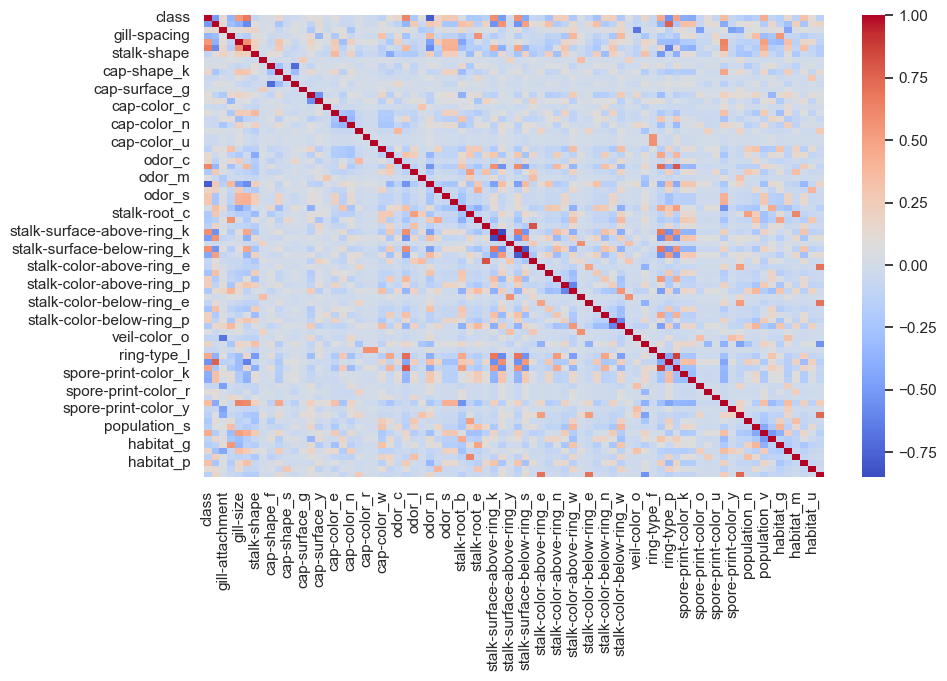

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.show()

In [97]:
X_new = df.drop(columns=['class'])
y_new = df['class']

#Train-Test-Split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [101]:
model_new = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
model_new.fit(X_train_new, y_train_new)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [102]:
y_pred_new = model_new.predict(X_test_new)

In [103]:
# Accuracy score
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [104]:
importance = model_new.feature_importances_
feature_names = X_train_new.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
print(feature_imp_df)

            Feature  Importance
0           bruises    0.029698
1   gill-attachment    0.000000
2      gill-spacing    0.026023
3         gill-size    0.069962
4        gill-color    0.105417
..              ...         ...
72        habitat_l    0.000798
73        habitat_m    0.008849
74        habitat_p    0.006403
75        habitat_u    0.006473
76        habitat_w    0.001327

[77 rows x 2 columns]


In [105]:
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_imp_df.head(20))

                       Feature  Importance
27                      odor_n    0.210284
4                   gill-color    0.105417
24                      odor_f    0.082485
3                    gill-size    0.069962
57                 ring-type_p    0.050414
38  stalk-surface-below-ring_k    0.041615
36  stalk-surface-above-ring_s    0.035232
58         spore-print-color_h    0.032632
0                      bruises    0.029698
35  stalk-surface-above-ring_k    0.029194
2                 gill-spacing    0.026023
56                 ring-type_l    0.025134
69                population_v    0.022833
64         spore-print-color_w    0.019050
33                stalk-root_e    0.017483
28                      odor_p    0.015089
31                stalk-root_b    0.011714
60         spore-print-color_n    0.010885
32                stalk-root_c    0.009974
59         spore-print-color_k    0.009846


In [106]:
top_features = feature_imp_df['Feature'].head(5).tolist()  
X_train_new = X_train_new[top_features]
X_test_new = X_test_new[top_features]

In [107]:
model_new = RandomForestClassifier(
    n_estimators=50, 
    max_depth=3, 
    min_samples_split=15,
    min_samples_leaf=7,
    max_features='sqrt',
    random_state=42)
model_new.fit(X_train_new, y_train_new)

RandomForestClassifier(max_depth=3, min_samples_leaf=7, min_samples_split=15,
                       n_estimators=50, random_state=42)

In [108]:
y_pred_new = model_new.predict(X_test_new)

In [109]:
# Accuracy score
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_new, X_train_new, y_train_new, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())  # Avg accuracy


Cross-validation accuracy: 0.9750730147450701


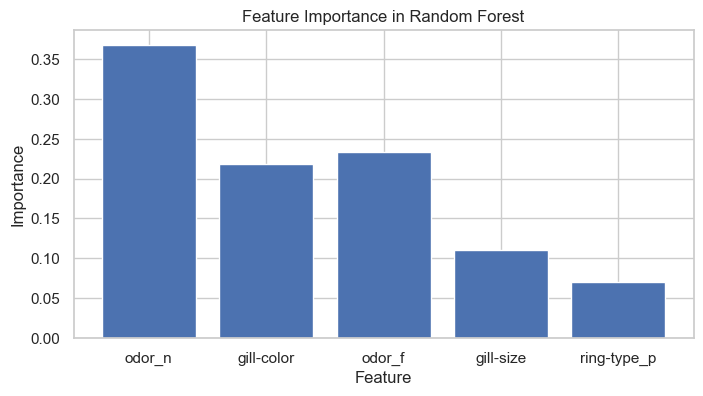

In [111]:
# Plot feature importance
plt.figure(figsize=(8, 4))
plt.bar(top_features, model_new.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

**Saving the Model**

In [112]:
import pickle

with open('mushroom_model.pkl', 'wb') as f:
    pickle.dump(model_new, f)

print("Model saved successfully as mushroom_model.pkl")

Model saved successfully as mushroom_model.pkl


In [131]:
# Extract the mapping dictionary
encoded_mapping = target_enc.mapping['gill-color']

# Convert to DataFrame
encoded_df = pd.DataFrame(list(encoded_mapping.items()), columns=['gill-color', 'Encoded Value'])

# Display the DataFrame
print(encoded_df)

    gill-color  Encoded Value
0            1       0.156863
1            2       0.106870
2            3       0.670213
3            4       0.428954
4            5       0.204659
5            6       0.721311
6            7       0.097561
7            8       0.000241
8            9       1.000000
9           10       0.792132
10          11       0.256121
11          12       0.005846
12          -1       0.482029
13          -2       0.482029


In [132]:
print(df['gill-color'].unique())  # Check if -1 or -2 exist in the data

[1.56862745e-01 1.06870229e-01 6.70212766e-01 4.28954424e-01
 2.04658902e-01 7.21311475e-01 9.75609756e-02 2.41111218e-04
 1.00000000e+00 7.92131668e-01 2.56121271e-01 5.84625202e-03]


In [135]:
# Get the target encoding mapping
encoded_values = target_enc.mapping['gill-color']

# Convert to DataFrame
encoded_df = pd.DataFrame(list(encoded_values.items()), columns=['Gill Color Initial', 'Encoded Value'])

print(encoded_df)

    Gill Color Initial  Encoded Value
0                    1       0.156863
1                    2       0.106870
2                    3       0.670213
3                    4       0.428954
4                    5       0.204659
5                    6       0.721311
6                    7       0.097561
7                    8       0.000241
8                    9       1.000000
9                   10       0.792132
10                  11       0.256121
11                  12       0.005846
12                  -1       0.482029
13                  -2       0.482029


In [147]:
print(df['gill-color'].unique())

['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']


In [152]:
print(df['gill-color'].unique())

[1.56862745e-01 1.06870229e-01 6.70212766e-01 4.28954424e-01
 2.04658902e-01 7.21311475e-01 9.75609756e-02 2.41111218e-04
 1.00000000e+00 7.92131668e-01 2.56121271e-01 5.84625202e-03]


In [140]:
print(df[['gill-color']].head(10))


  gill-color
0          k
1          k
2          n
3          n
4          k
5          n
6          g
7          n
8          p
9          g
